In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv


In [2]:
df = pd.read_csv("/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv")

In [3]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
df.isnull().sum()

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

In [6]:
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


**A razão de não termos outros elementos é por conta do formato deles, como a maior parte está como object não conseguimos ter informações estatísticas. Vamos precisar fazer uma *limpeza* nos dados fornecidos**

# Limpando os dados

In [7]:
# 1. Remover separadores de milhar e converter para numérico as colunas 'Video views', 'Likes' e 'Dislikes'
# Vamos remover qualquer vírgula ou ponto e depois converter para int.

col_limp = ['Video views', 'Likes', 'Dislikes']
for coluna in col_limp:
    df[coluna] = df[coluna].replace(',', '', regex=True)

# Convertendo para valores numéricos
col_num = ['Video views', 'Likes', 'Dislikes']
for coluna in col_num:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

In [8]:
# 2. Preencher valores ausentes da coluna 'Category' com "desconhecido"
df['Category'] = df['Category'].fillna('desconhecido')

In [9]:
# 3. Tratamento para a coluna 'Dislikes':
# Vamos preencher os valores faltantes da coluna 'Dislikes' com 0, caso deseje.
# Caso prefira outro valor (como a mediana ou a média), é só ajustar.

df['Dislikes'] = df['Dislikes'].fillna(0)

# Exibindo o DataFrame atualizado
print(df.head())


   rank                                              Video  Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54071677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3471237   
2     3                 JoJo Siwa - Karma (Official Video)     34206747   
3     4    David Kushner - Daylight (Official Music Video)     18558390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...   6547981039   

      Likes  Dislikes      Category  published  
0   3497955   78799.0         Music       2019  
1     19023     859.0  desconhecido       2017  
2    293563       0.0         Music       2024  
3    680732       0.0         Music       2023  
4  44428537       0.0         Music       2015  


# Analise exploratória

In [10]:
df.describe()

,rank,Video views,Likes,Dislikes,published
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.453435e+07,3.685451e+05,1223.865000,2019.100000
std,288.819436,2.512570e+08,1.629418e+06,7099.957793,5.384328
min,1.000000,4.493900e+04,4.330000e+02,0.000000,2005.000000
25%,250.750000,9.815690e+05,9.427250e+03,0.000000,2017.000000
50%,500.500000,2.341652e+06,3.026200e+04,57.000000,2021.000000
75%,750.250000,1.162638e+07,1.649858e+05,523.250000,2024.000000
max,1000.000000,6.547981e+09,4.442854e+07,178042.000000,2025.000000


In [11]:
sns.set_style("whitegrid")

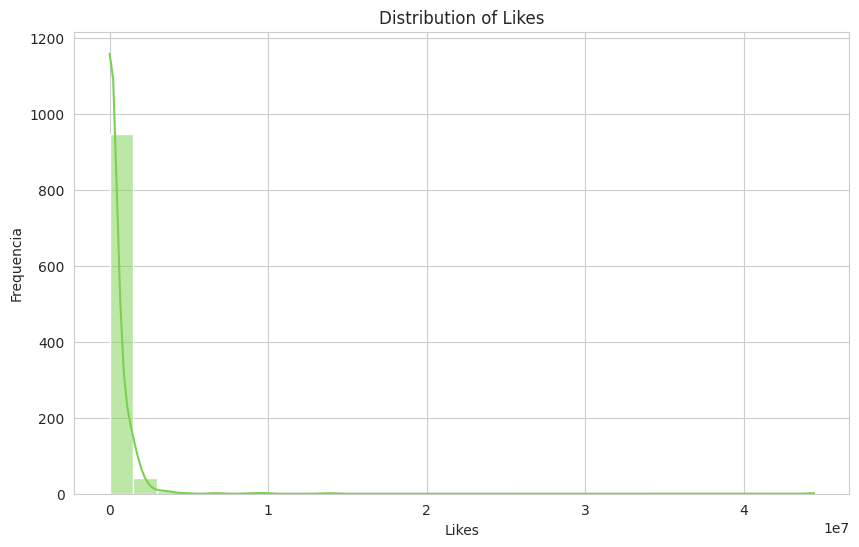

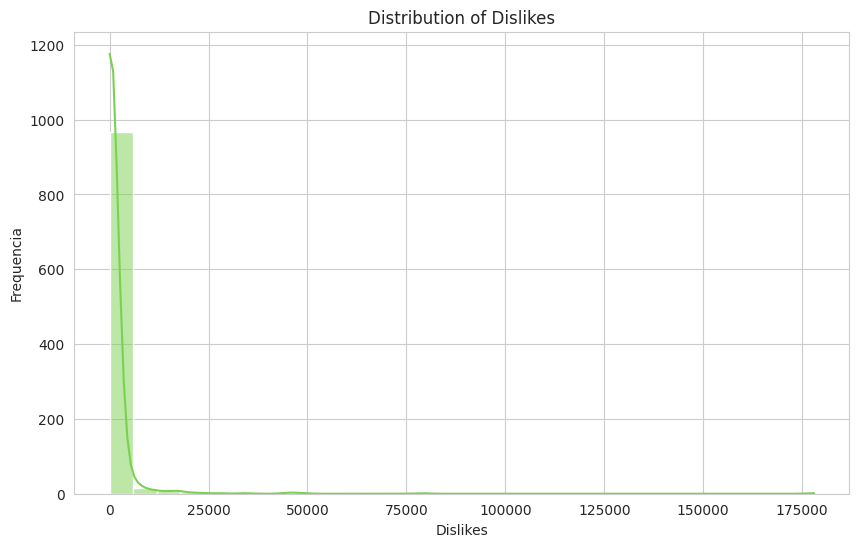

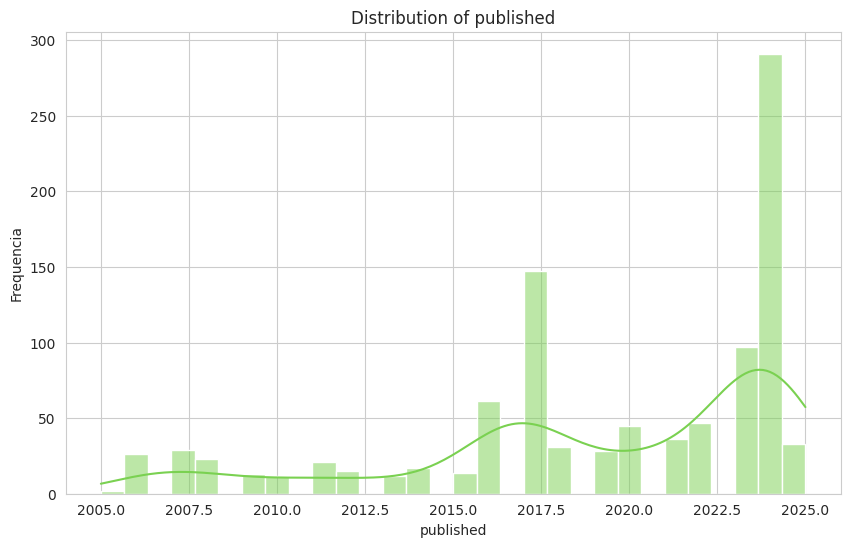

In [12]:
# Distribuição de colunas númericas(histograma)
col_numericas = ['Likes', 'Dislikes', 'published']
for col in col_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color=plt.cm.viridis(0.8))
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequencia')
    plt.show()

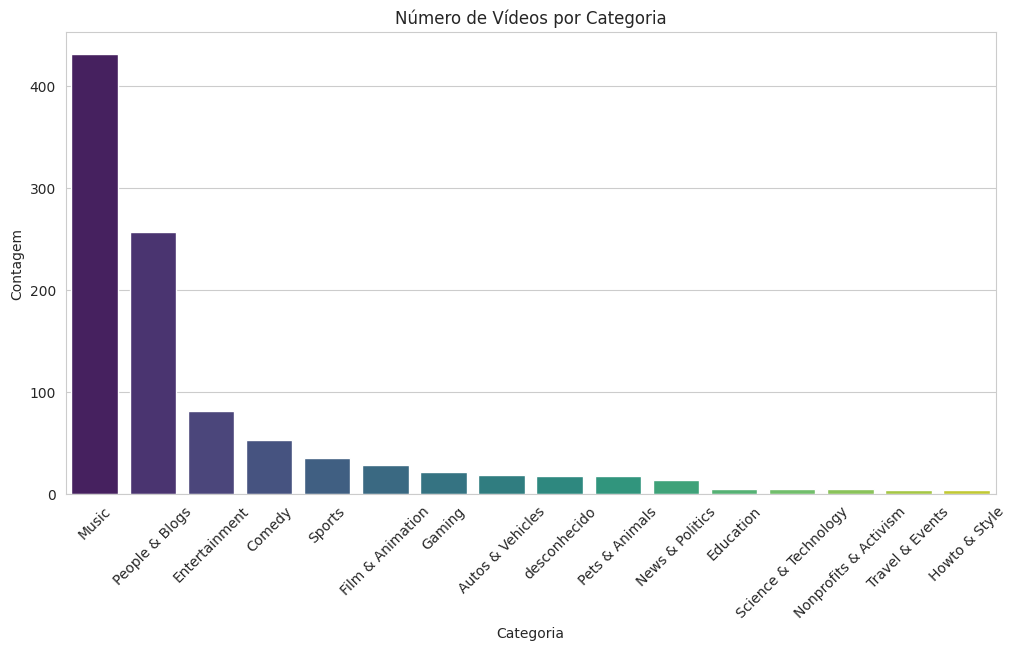

In [13]:
# Gráfico de Contagem para Categorias
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Número de Vídeos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [14]:
qtd = df['Category'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Category', 'Frequencia']
qtd

,Category,Frequencia
0,Music,431
1,People & Blogs,257
2,Entertainment,81
3,Comedy,53
4,Sports,35
5,Film & Animation,29
6,Gaming,22
7,Autos & Vehicles,19
8,desconhecido,18
9,Pets & Animals,18


In [15]:
# Convertendo a coluna 'Likes' para numérico, se necessário
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

# Ordenando os vídeos pelos valores de 'Likes' em ordem decrescente e selecionando os 10 maiores
top_likes = df.sort_values(by='Likes', ascending=False).head(10)

# Exibindo os 10 vídeos com mais likes
top_likes[['Video', 'Likes']]


,Video,Likes
4,Wiz Khalifa - See You Again ft. Charlie Puth [...,44428537
60,"Pedro Capó, Farruko - Calma (Remix - Official ...",13755637
136,"ROSALÍA, J Balvin - Con Altura (Official Video...",9768545
31,"6ix9ine - FEFE ft. Nicki Minaj, Murda Beatz",9015394
381,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",6622023
278,0 Sharpness knife test?💀,4702361
25,Olivia Rodrigo - drivers license (Official Video),3810456
192,A disabled duckling helps his cat friend 🐥 #Du...,3749872
0,Lil Nas X - Old Town Road (Official Movie) ft....,3497955
363,Could you do it faster?,3470844


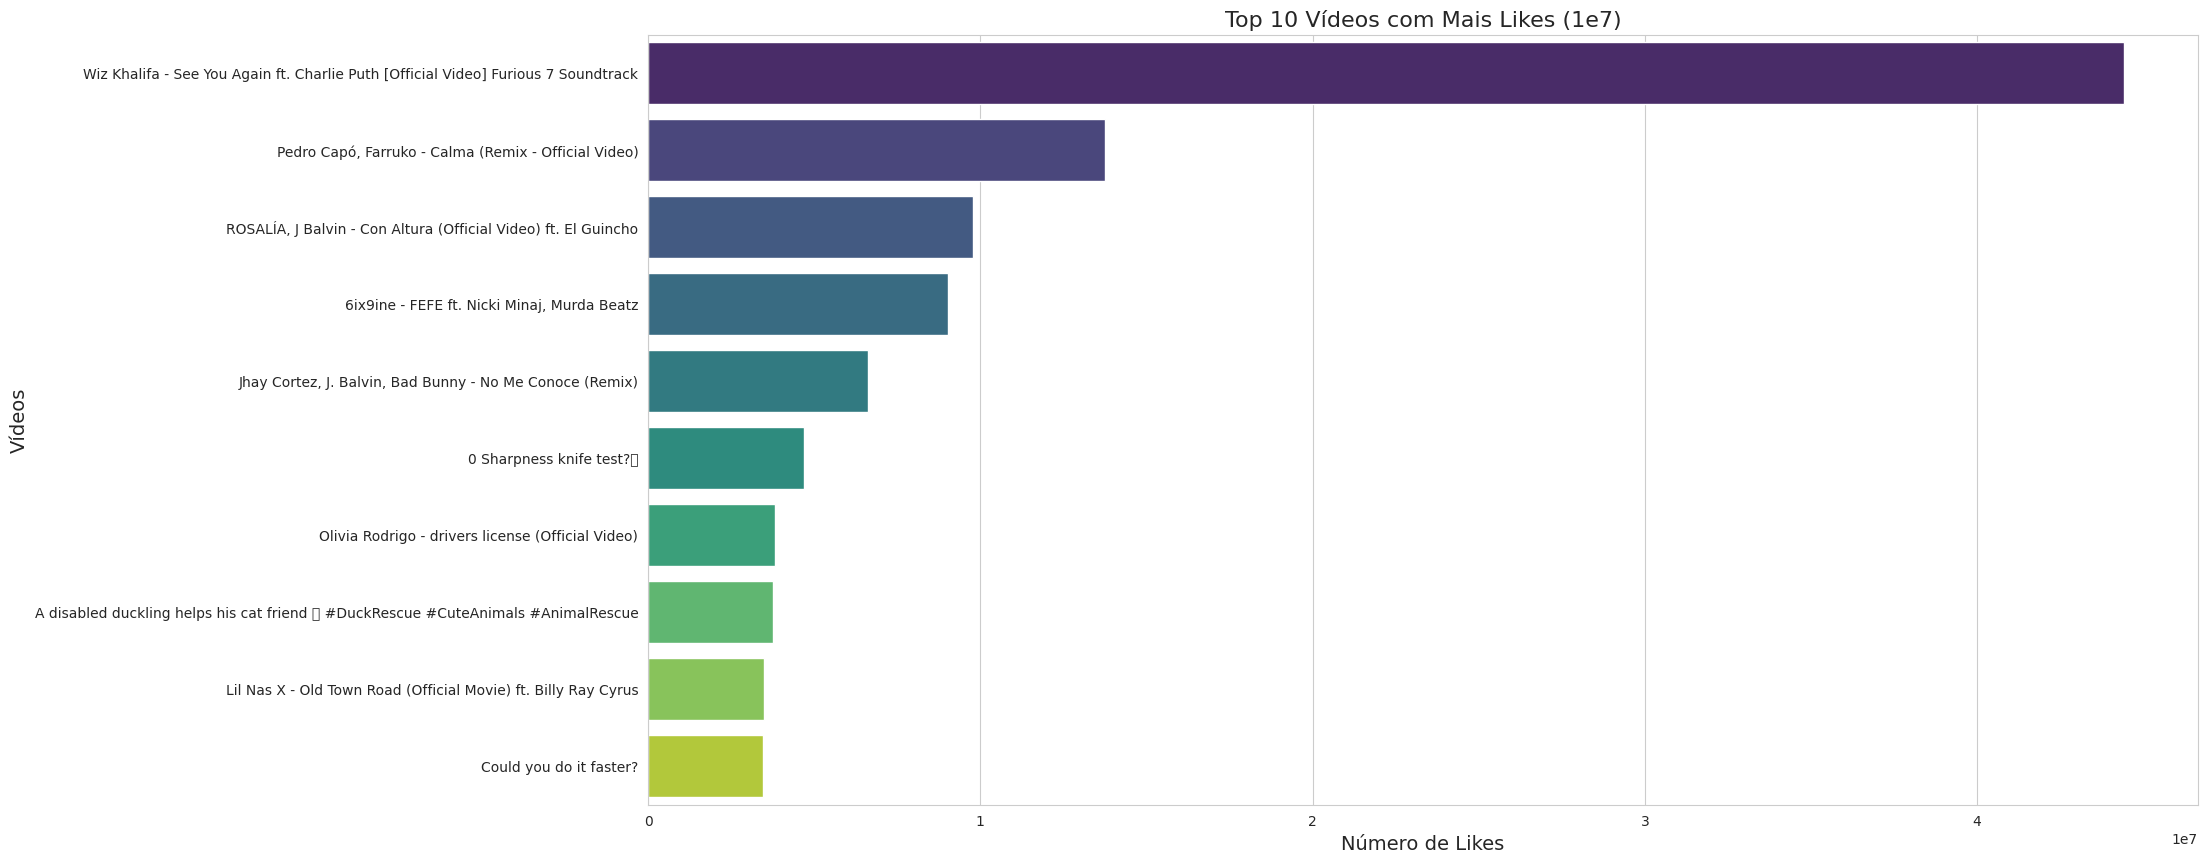

In [16]:
# Criando o gráfico de barras
plt.figure(figsize=(20, 10))  # Ajuste o tamanho do gráfico
sns.barplot(x='Likes', y='Video', data=top_likes, palette='viridis')

# Títulos e rótulos
plt.title('Top 10 Vídeos com Mais Likes (1e7)', fontsize=16)
plt.xlabel('Número de Likes', fontsize=14)
plt.ylabel('Vídeos', fontsize=14)

# Exibindo o gráfico
plt.show()